In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('C:\\Users\\rishi\\OneDrive\\Desktop\\Project-449\\Copy of Regrerssion_energy_production_data (2).csv',sep=';')

In [7]:
print(df)

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
0            9.59           38.56       1017.01       60.10             481.30
1           12.04           42.34       1019.72       94.67             465.36
2           13.87           45.08       1024.42       81.69             465.48
3           13.72           54.30       1017.89       79.08             467.05
4           15.14           49.64       1023.78       75.00             463.58
...           ...             ...           ...         ...                ...
9563        17.10           49.69       1005.53       81.82             457.32
9564        24.73           65.34       1015.42       52.80             446.92
9565        30.44           56.24       1005.19       56.24             429.34
9566        23.00           66.05       1020.61       80.29             421.57
9567        17.75           49.25       1020.86       63.67             454.41

[9568 rows x 5 columns]


In [8]:
df.head(10)

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
5,23.63,60.93,1006.41,83.06,439.90
6,22.99,61.02,1009.88,81.56,440.85
7,12.85,40.00,1015.89,68.85,463.74
8,29.88,68.08,1011.14,55.78,429.33
9,23.22,66.56,1002.47,85.39,437.11


In [9]:
df.tail(10)

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
9558,11.81,40.75,1016.13,84.14,477.22
9559,14.73,40.35,1011.15,65.20,470.03
9560,25.84,69.14,1009.22,88.47,431.35
9561,21.90,63.13,1011.54,81.83,447.40
9562,21.85,63.86,1020.16,68.84,445.62
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57
9567,17.75,49.25,1020.86,63.67,454.41


In [10]:
print(df.columns)

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')


In [11]:
df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [12]:
df.duplicated().sum()

41

In [13]:
df.drop_duplicates()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


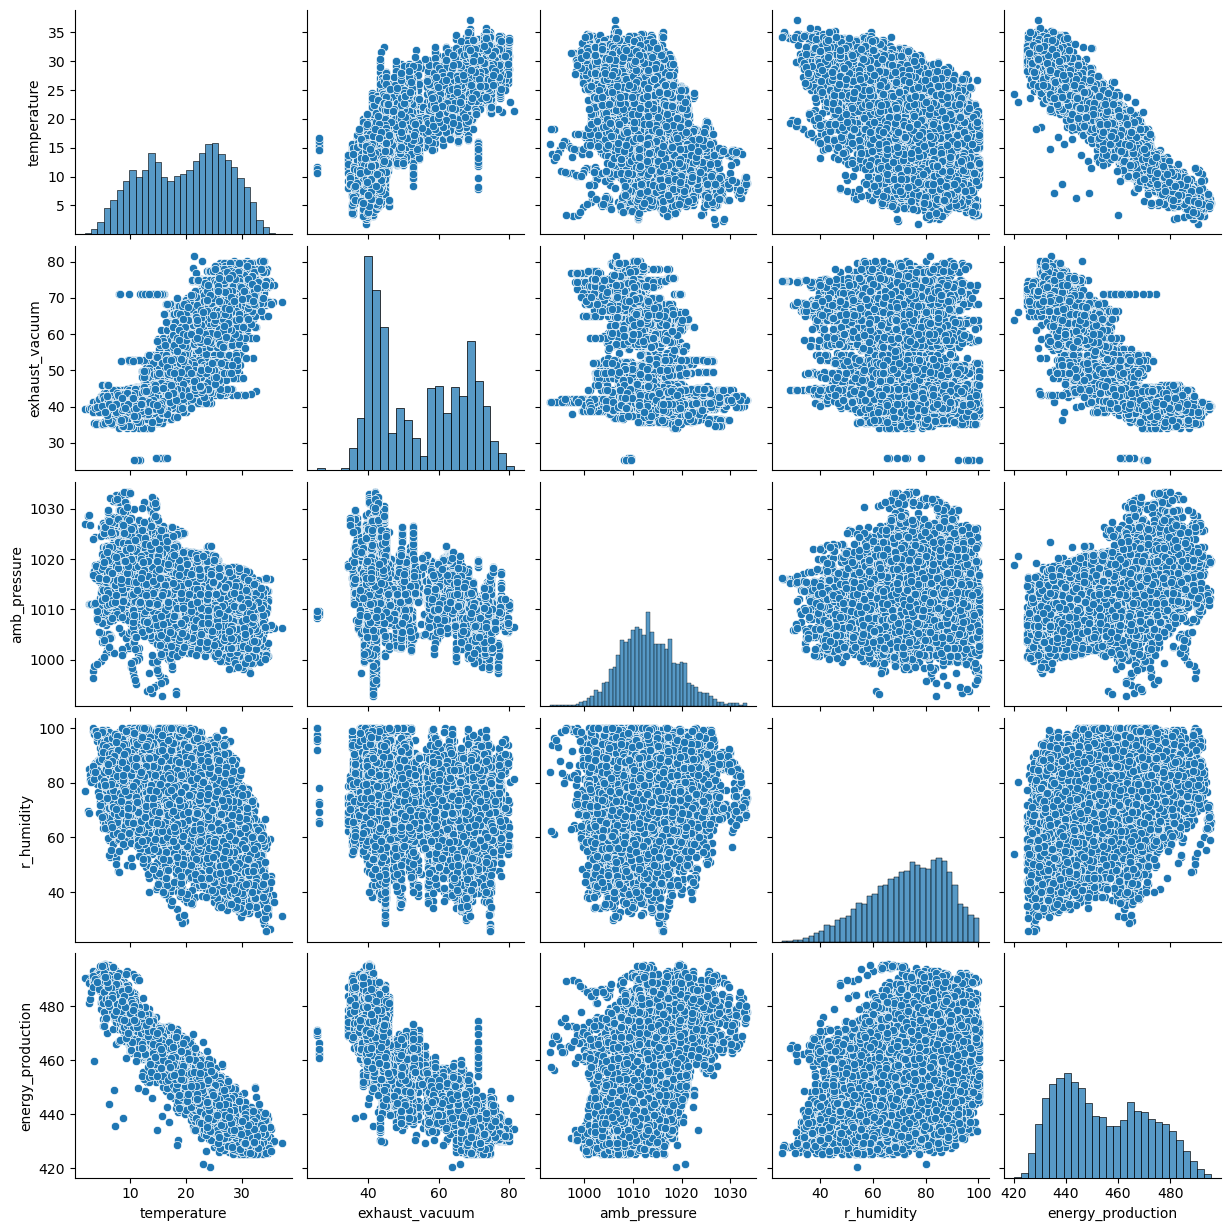

In [14]:
sns.pairplot(df)

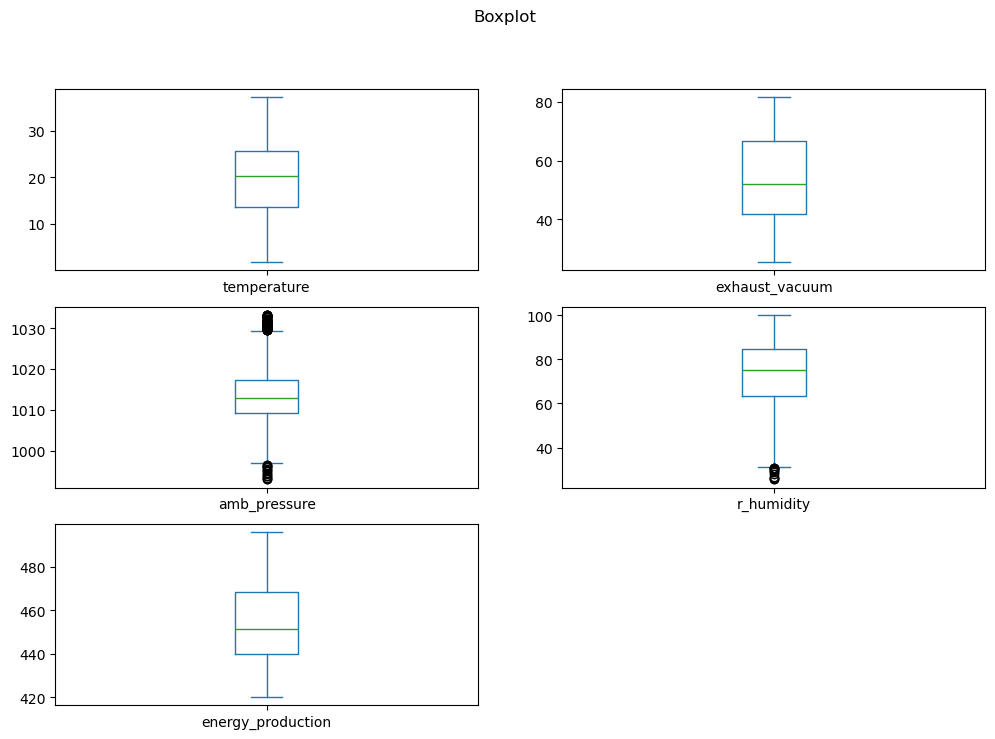

In [16]:
df.plot(kind='box', subplots=True,figsize=(12,8),layout=(3,2), sharex=False,sharey=False)
plt.suptitle('Boxplot')
plt.show()


In [17]:
#Remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 *IQR))).any(axis=1)]

In [18]:
#After outliers
print("Shape after removing outliers:", df_clean.shape)

Shape after removing outliers: (9468, 5)


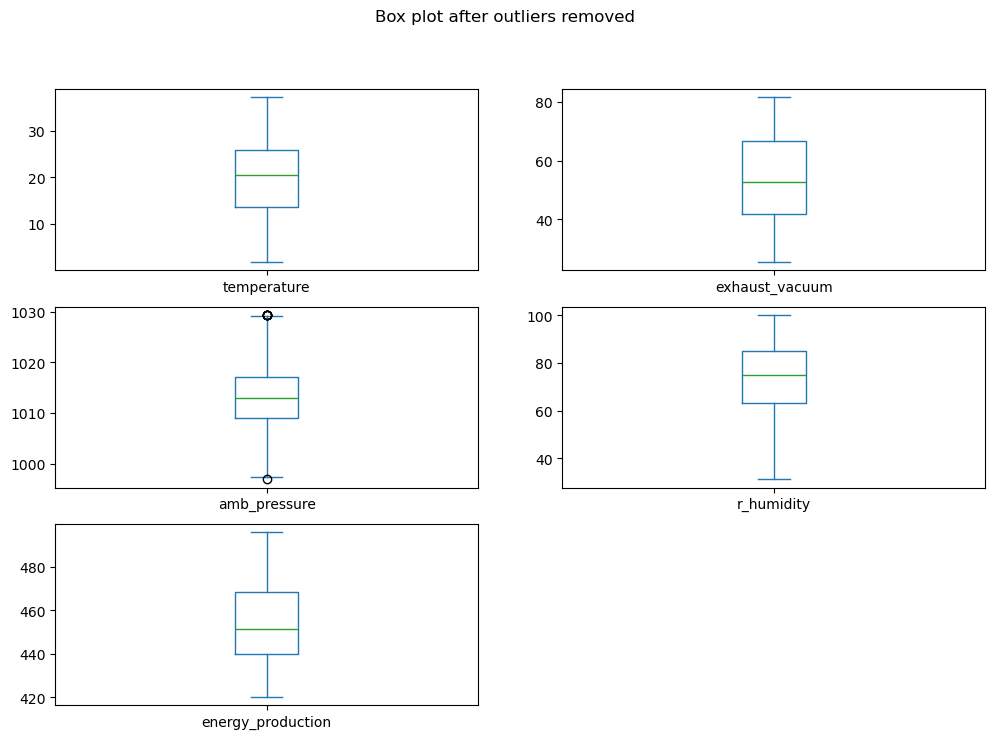

In [20]:
df_clean.plot(kind='box', subplots=True,figsize=(12,8),layout=(3,2), sharex=False, sharey=False)
plt.suptitle('Box plot after outliers removed')
plt.show()
              

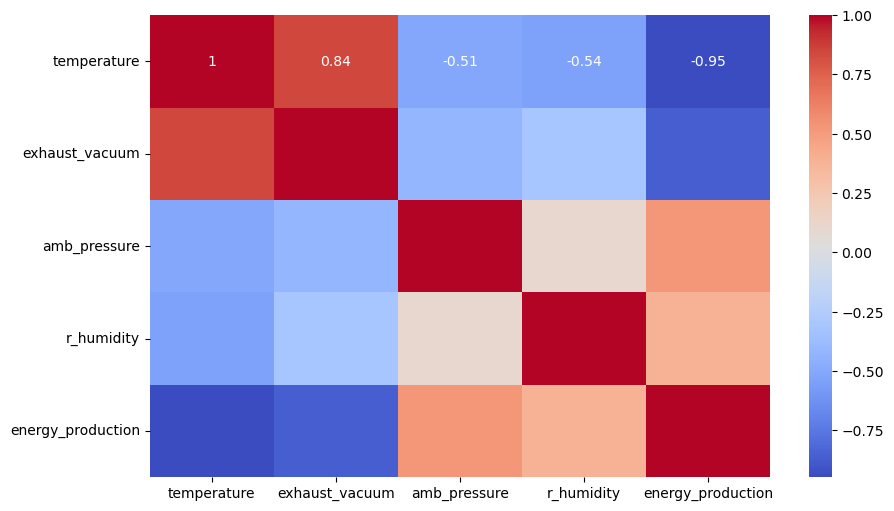

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.show()

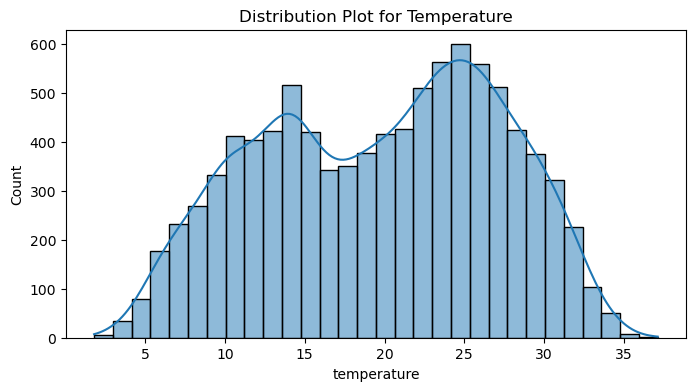

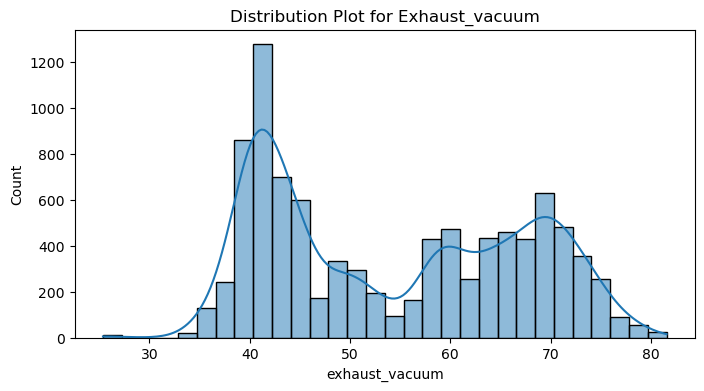

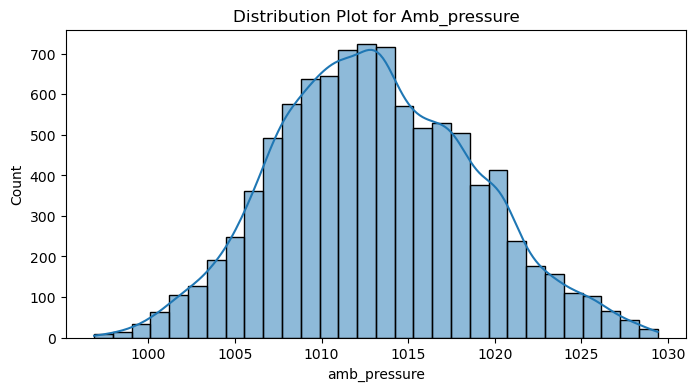

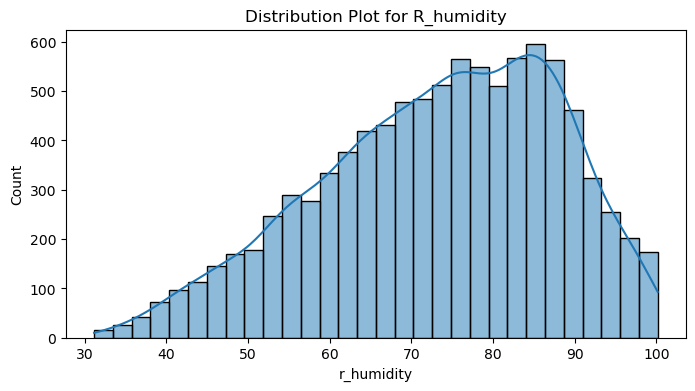

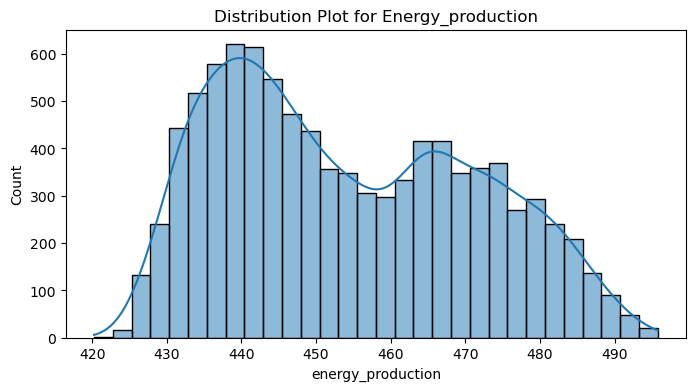

In [22]:
for col in df_clean:
    plt.figure(figsize=(8,4))
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(f'Distribution Plot for {col.capitalize()}')
    plt.show()

In [23]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [24]:
# Split the data into features (X) and target (y)
X = df.drop('energy_production', axis=1)
y = df['energy_production']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Dictionary to store model results
results = {}

In [28]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

results['Linear Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lin),
    'MAE': mean_absolute_error(y_test, y_pred_lin),
    'R2': r2_score(y_test, y_pred_lin)
}

In [29]:
# SVR Model
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

results['SVR'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'MAE': mean_absolute_error(y_test, y_pred_svr),
    'R2': r2_score(y_test, y_pred_svr)
}


In [30]:
# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

results['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}


In [31]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

results['Lasso Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'MAE': mean_absolute_error(y_test, y_pred_lasso),
    'R2': r2_score(y_test, y_pred_lasso)
}


In [32]:
# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

results['Ridge Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'MAE': mean_absolute_error(y_test, y_pred_ridge),
    'R2': r2_score(y_test, y_pred_ridge)
}


In [33]:
# Decision Tree Regression
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

results['Decision Tree Regression'] = {
    'MSE': mean_squared_error(y_test, y_pred_dt),
    'MAE': mean_absolute_error(y_test, y_pred_dt),
    'R2': r2_score(y_test, y_pred_dt)
}

In [34]:
# Compare the models
comparison_df = pd.DataFrame(results).T
print(comparison_df)

                                MSE       MAE        R2
Linear Regression         20.988341  3.633832  0.930821
SVR                       17.900349  3.159876  0.940999
Random Forest             11.174366  2.348666  0.963168
Lasso Regression          21.097081  3.648236  0.930463
Ridge Regression          20.988522  3.633864  0.930820
Decision Tree Regression  18.069383  2.952205  0.940442


In [35]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

In [36]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_reg.predict(X_test_scaled)

results['XGBoost'] = {
    'MSE': mean_squared_error(y_test, y_pred_xgb),
    'MAE': mean_absolute_error(y_test, y_pred_xgb),
    'R2': r2_score(y_test, y_pred_xgb)
}

In [37]:
lgbm_reg = LGBMRegressor()
lgbm_reg.fit(X_train_scaled, y_train)
y_pred_lgbm = lgbm_reg.predict(X_test_scaled)

results['LightGBM'] = {
    'MSE': mean_squared_error(y_test, y_pred_lgbm),
    'MAE': mean_absolute_error(y_test, y_pred_lgbm),
    'R2': r2_score(y_test, y_pred_lgbm)
}

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 7654, number of used features: 4
[LightGBM] [Info] Start training from score 454.345064


In [38]:
comparison_df = pd.DataFrame(results).T
print(comparison_df)

                                MSE       MAE        R2
Linear Regression         20.988341  3.633832  0.930821
SVR                       17.900349  3.159876  0.940999
Random Forest             11.174366  2.348666  0.963168
Lasso Regression          21.097081  3.648236  0.930463
Ridge Regression          20.988522  3.633864  0.930820
Decision Tree Regression  18.069383  2.952205  0.940442
XGBoost                   10.083559  2.216406  0.966764
LightGBM                  11.820536  2.478710  0.961039


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

In [40]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)

results['Gradient Boosting'] = {
    'MSE': mean_squared_error(y_test, y_pred_gbr),
    'MAE': mean_absolute_error(y_test, y_pred_gbr),
    'R2': r2_score(y_test, y_pred_gbr)
}

In [41]:
elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled, y_train)
y_pred_en = elastic_net.predict(X_test_scaled)

results['Elastic Net'] = {
    'MSE': mean_squared_error(y_test, y_pred_en),
    'MAE': mean_absolute_error(y_test, y_pred_en),
    'R2': r2_score(y_test, y_pred_en)
}


In [42]:
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

results['KNN'] = {
    'MSE': mean_squared_error(y_test, y_pred_knn),
    'MAE': mean_absolute_error(y_test, y_pred_knn),
    'R2': r2_score(y_test, y_pred_knn)
}

In [43]:
catboost_reg = CatBoostRegressor(silent=True)  # Set silent=True to suppress output
catboost_reg.fit(X_train_scaled, y_train)
y_pred_cat = catboost_reg.predict(X_test_scaled)

results['CatBoost'] = {
    'MSE': mean_squared_error(y_test, y_pred_cat),
    'MAE': mean_absolute_error(y_test, y_pred_cat),
    'R2': r2_score(y_test, y_pred_cat)
}

In [44]:
# Create a DataFrame to compare results
comparison_df = pd.DataFrame(results).T
print(comparison_df)

                                MSE       MAE        R2
Linear Regression         20.988341  3.633832  0.930821
SVR                       17.900349  3.159876  0.940999
Random Forest             11.174366  2.348666  0.963168
Lasso Regression          21.097081  3.648236  0.930463
Ridge Regression          20.988522  3.633864  0.930820
Decision Tree Regression  18.069383  2.952205  0.940442
XGBoost                   10.083559  2.216406  0.966764
LightGBM                  11.820536  2.478710  0.961039
Gradient Boosting         15.551967  2.938830  0.948740
Elastic Net               43.335052  5.365646  0.857165
KNN                       14.951743  2.756375  0.950718
CatBoost                  10.929063  2.360836  0.963977


In [45]:
import pickle
filename = 'xgboost_model.pkl'
pickle.dump(xgb_reg, open(filename, 'wb'))
print(f"XGBoost model saved to {filename}")


XGBoost model saved to xgboost_model.pkl
